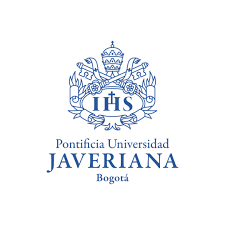
***Pontificia Universidad Javeriana***
# **Procesamiento de Alto Volumen de Datos**

### Taller: **Métricas de Rendimiento para Modelos de Clasificación con PySpark**

Autor: Paula Andrea Velasquez Romero

Fecha: 19/05/2025

**Objetivo**: Evaluar modelo de clasificación MLlib

- La clasificación se utiliza para clasificar datos en etiquetas o clases predefinidas. Para evaluar el rendimiento de un modelo de clasificación se suelen utilizar métricas como: accuracy, precision, recall, F1 score y la matriz de confusión. Estas métricas son útiles para evaluar lo bien que el modelo distingue entre clases, especialmente en casos de conjuntos de datos desequilibrados. Al conocer los puntos fuertes y débiles de cada métrica, se podrá seleccionar la más adecuada para un problema de clasificación determinado.

- MLlib de PySpark, se presenta un conjunto de clases: BinaryClassificationEvaluator, MulticlassificationEvaluator, y RegressionEvaluator-diseñadas para evaluar el rendimiento de los modelos de aprendizaje automático calculando métricas específicas a partir de predicciones y etiquetas verdaderas. Se utilizan para evaluar modelos entrenados con estimadores como RandomForestClassifier o GBTRegressor, tomando un DataFrame con valores predichos y reales para producir una única puntuación de rendimiento. Ejecutados a través de una SparkSession, aprovechan los ejecutores de Spark para la computación distribuida, lo que los hace ideales para **BIG DATA** de fuentes como archivos CSV o Parquet. Se integran en herramientas de ajuste como CrossValidator y TrainValidationSplit, ofreciendo una solución escalable para la evaluación de modelos.
____________________________________________________

**1.- Crear sessión PySpark**



```
from pyspark.sql.functions import col, when, avg
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Taller_Metricas").getOrCreate()

cores = spark._jsc.sc().getExecutorMemoryStatus().keySet().size()
print("Ejcución de las tareas en ", cores, "core(s) del sistema de cómputo actual")
spark
```



In [1]:
from pyspark.sql.functions import col, when, avg
from pyspark.sql import SparkSession

# Crea o recupera una sesión de Spark con el nombre de aplicación "Taller_Metricas".
spark = SparkSession.builder.appName("Taller_Metricas").getOrCreate()
# Obtiene el número de cores (núcleos de CPU) utilizados por Spark en el sistema actual.
cores = spark._jsc.sc().getExecutorMemoryStatus().keySet().size()

print("Ejcución de las tareas en ", cores, "core(s) del sistema de cómputo actual")
spark

Ejcución de las tareas en  1 core(s) del sistema de cómputo actual


**2.-Cargar DataFrame Spark:**
- Enlace de datos: https://github.com/corredor-john/ExploratoryDataAnalisys/blob/main/Varios/heart_taller_eval_PySpark.csv

```
from pyspark import SparkFiles
url_github = "Enlace de datos"

spark.sparkContext.addFile(url_github)
df00 = spark.read.csv(SparkFiles.get("fichero.csv"),inferSchema=True, header=True)
df00.show(5)
```

In [2]:
from pyspark import SparkFiles
# Definir la URL del archivo CSV alojado en GitHub (datos de un estudio cardíaco)
url_github = "https://raw.githubusercontent.com/corredor-john/ExploratoryDataAnalisys/refs/heads/main/Varios/heart_taller_eval_PySpark.csv"
# Descargar el archivo desde la URL y distribuirlo a todos los nodos del cluster Spark
spark.sparkContext.addFile(url_github)
df00 = spark.read.csv(SparkFiles.get("heart_taller_eval_PySpark.csv"),inferSchema=True, header=True)
df00.show(5)

+---+---+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+
|Age|Sex|ChestPainType|RestingBP|Cholesterol|FastingBS|RestingECG|MaxHR|ExerciseAngina|Oldpeak|ST_Slope|HeartDisease|
+---+---+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+
| 40|  M|          ATA|      140|        289|        0|    Normal|  172|             N|    0.0|      Up|           0|
| 49|  F|          NAP|      160|        180|        0|    Normal|  156|             N|    1.0|    Flat|           1|
| 37|  M|          ATA|      130|        283|        0|        ST|   98|             N|    0.0|      Up|           0|
| 48|  F|          ASY|      138|        214|        0|    Normal|  108|             Y|    1.5|    Flat|           1|
| 54|  M|          NAP|      150|        195|        0|    Normal|  122|             N|    0.0|      Up|           0|
+---+---+-------------+---------+-----------+---------+-

**3.- Revisión de Datos Nulos o Imposibles:**


```
from pyspark.sql.functions import *

df3.select([count(when(col(c).contains('None') |
col(c).contains('NULL') |
(col(c) == '' ) |
col(c).isNull() | isnan(c), c )).alias(c)
for c in df34.columns]).show()
)
```

In [3]:
from pyspark.sql.functions import *
df3 = df00
# Análisis de valores faltantes o inválidos en todas las columnas.
df3.select([count(when(col(c).contains('None') |
col(c).contains('NULL') |
(col(c) == '' ) |
col(c).isNull() | isnan(c), c )).alias(c)
for c in df3.columns]).show()


+---+---+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+
|Age|Sex|ChestPainType|RestingBP|Cholesterol|FastingBS|RestingECG|MaxHR|ExerciseAngina|Oldpeak|ST_Slope|HeartDisease|
+---+---+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+
|  0|  0|            0|        0|          0|        0|         0|    0|             0|      0|       0|           0|
+---+---+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+



###Análisis:
No se observan valores nulos, se procede con la limpieza.

**4.- Relación entre las variables**
- Escriba algunas apreciaciones de las relaciones


```
import matplotlib
import seaborn

plt.figure(figsize =(X,x))
vista_pandas = df6.toPandas()
sns.heatmap(vista_pandas.select_dtypes(np.number).corr(), annot=True, center=0, cmap ='RdYlGn')
```

<Axes: >

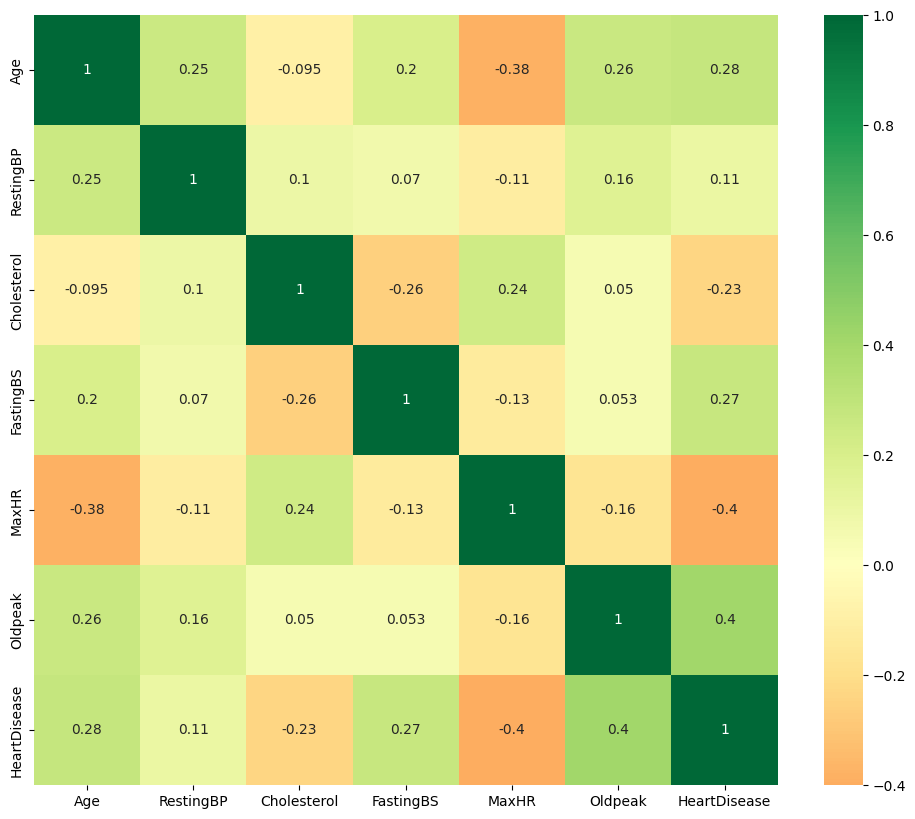

In [4]:
#Matriz de correlación
import matplotlib.pyplot as plt
import seaborn as sns
df6=df3
plt.figure(figsize =(12,10))
vista_pandas = df6.toPandas()
sns.heatmap(vista_pandas.select_dtypes(np.number).corr(), annot=True, center=0, cmap ='RdYlGn')

###Análisis
Se observa que las variables más fuertemente relacionadas con la presencia de cardiopatía (HeartDisease) son MaxHR (−0.40) y Oldpeak (0.40). Esto indica que una menor frecuencia cardíaca máxima (MaxHR) y un mayor valor del segmento ST en el electrocardiograma (Oldpeak) están asociados con un mayor riesgo de padecer una cardiopatía. Además, se aprecia una fuerte correlación negativa entre Age (−0.38) y MaxHR, lo que sugiere que a mayor edad, menor es la frecuencia cardíaca máxima alcanzada.

### Ingeniería de características

**5.- Consulte los tipos de datos**



```
dfBog.dtypes
```

In [5]:
dfBog=df6
dfBog.dtypes

[('Age', 'int'),
 ('Sex', 'string'),
 ('ChestPainType', 'string'),
 ('RestingBP', 'int'),
 ('Cholesterol', 'int'),
 ('FastingBS', 'int'),
 ('RestingECG', 'string'),
 ('MaxHR', 'int'),
 ('ExerciseAngina', 'string'),
 ('Oldpeak', 'double'),
 ('ST_Slope', 'string'),
 ('HeartDisease', 'int')]

**6.- Funciones para datos ETIQUETAS o categorías a Numéricos**
- 6.1: Imprimir todas las columnas de Etiquetas del tipo string


```
dataframe.select('Columna_Str_A').distinct().show()
dataframe.select('Columna_Str_H').distinct().show()
```



In [6]:
#Columnas tipo string
dfBog.select('Sex').distinct().show()
dfBog.select('ChestPainType').distinct().show()
dfBog.select('RestingECG').distinct().show()
dfBog.select('ExerciseAngina').distinct().show()
dfBog.select('ST_Slope').distinct().show()

+---+
|Sex|
+---+
|  F|
|  M|
+---+

+-------------+
|ChestPainType|
+-------------+
|          NAP|
|          ATA|
|           TA|
|          ASY|
+-------------+

+----------+
|RestingECG|
+----------+
|       LVH|
|    Normal|
|        ST|
+----------+

+--------------+
|ExerciseAngina|
+--------------+
|             Y|
|             N|
+--------------+

+--------+
|ST_Slope|
+--------+
|    Flat|
|      Up|
|    Down|
+--------+



- 6.2: Usar la función para cambiar a dato numéricos

```
from pyspark.sql.types import *
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler

def fun_Etiquetas(df):
    trans_df = df.select("*",(when(df.ExerciseAngina=='Y', 1).otherwise(0)).alias('yes_exercise_angina')
                 ,(when(df.ChestPainType=='ATA', 1).otherwise(0)).alias('ata_chest_pain_type')
              ,(when(df.ChestPainType=='ASY', 1).otherwise(0)).alias('asy_chest_pain_type')
              ,(when(df.ST_Slope=='Up', 1).otherwise(0)).alias('up_st_slope')
              ,(when(df.Sex=='F', 1).otherwise(0)).alias('f_sex')
              ,(when(df.RestingECG=='ST', 1).otherwise(0)).alias('st_resting_ecg')
                 )
        .drop('ExerciseAngina','ChestPainType', 'ST_Slope', 'Sex', 'RestingECG')
        .withColumnRenamed("HeartDisease", 'label')

features_list = trans_df.columns
print(features_list)
features_list.remove('label')
assembler = VectorAssembler(inputCols=features_list,outputCol='features')
vector_trans_df = assembler.transform(trans_df).select('features','label')
    
return vector_trans_df, trans_df


vector_trans_df, trans_df = fun_Etiquetas(dataframes)
```

In [7]:
from pyspark.sql.types import *
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import when
# Función que transforma variables categóricas en dummy binaries y prepara los datos para ML
def fun_Etiquetas(df):
    trans_df = df.select("*",
                         (when(df.ExerciseAngina=='Y', 1).otherwise(0)).alias('yes_exercise_angina'),
                         (when(df.ChestPainType=='ATA', 1).otherwise(0)).alias('ata_chest_pain_type'),
                         (when(df.ChestPainType=='ASY', 1).otherwise(0)).alias('asy_chest_pain_type'),
                         (when(df.ST_Slope=='Up', 1).otherwise(0)).alias('up_st_slope'),
                         (when(df.Sex=='F', 1).otherwise(0)).alias('f_sex'),
                         (when(df.RestingECG=='ST', 1).otherwise(0)).alias('st_resting_ecg')
                        ) \
                 .drop('ExerciseAngina','ChestPainType', 'ST_Slope', 'Sex', 'RestingECG') \
                 .withColumnRenamed("HeartDisease", 'label')

    features_list = trans_df.columns
    print(features_list)
    features_list.remove('label')
    # Crear el vector de características usando VectorAssembler
    assembler = VectorAssembler(inputCols=features_list,outputCol='features')
    vector_trans_df = assembler.transform(trans_df).select('features','label')

    return vector_trans_df, trans_df

vector_trans_df, trans_df = fun_Etiquetas(dfBog)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'label', 'yes_exercise_angina', 'ata_chest_pain_type', 'asy_chest_pain_type', 'up_st_slope', 'f_sex', 'st_resting_ecg']


6.3.- Imprimir 5 primeros valores de la transformación a vectores

```
vector_trans_df.show(n, False)

```

In [8]:
#Primeros 5 valores de la transformación
vector_trans_df.show(5, False)

+--------------------------------------------------------+-----+
|features                                                |label|
+--------------------------------------------------------+-----+
|(12,[0,1,2,4,7,9],[40.0,140.0,289.0,172.0,1.0,1.0])     |0    |
|(12,[0,1,2,4,5,10],[49.0,160.0,180.0,156.0,1.0,1.0])    |1    |
|[37.0,130.0,283.0,0.0,98.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0] |0    |
|[48.0,138.0,214.0,0.0,108.0,1.5,1.0,0.0,1.0,0.0,1.0,0.0]|1    |
|(12,[0,1,2,4,9],[54.0,150.0,195.0,122.0,1.0])           |0    |
+--------------------------------------------------------+-----+
only showing top 5 rows



**7.- División de Datos Entrenamiento y Prueba**


```
entrenamiento, prueba = vector_trans_df.randomSplit([0.7,0.3], seed = 13)

```

In [9]:
# División de datos 70% entrenamiento y 30% prueba

entrenamiento, prueba = vector_trans_df.randomSplit([0.7,0.3], seed = 13)

**8.- Consulta: Escriba sus apreciaciones sobre el balanceo de los datos, en Entrenamiento y en los de Prueba**



```
total=float(entrenamiento.select("label").count())
Positivos=entrenamiento.select("label").where('label == 1').count()
porcentaje=(float(Positivos)/float(total))*100
Negativos=float(total-Negativos)
print('Cantidad de positivos {}'.format(Positivos))
print('Percentaje de positivos {}'.format(porcentaje))

```

In [10]:
# Conteo de ejemplos negativos (clase 0) en el conjunto de entrenamiento
Negativos_count = entrenamiento.select("label").where('label == 0').count()
print('Cantidad de negativos {}'.format(Negativos_count))

total_prueba = float(prueba.select("label").count())
Positivos_prueba = prueba.select("label").where('label == 1').count()

# Cálculo del porcentaje de positivos en el conjunto de prueba
porcentaje_prueba = (float(Positivos_prueba) / float(total_prueba)) * 100
# Cálculo de negativos en prueba (por diferencia)
Negativos_prueba_count = float(total_prueba - Positivos_prueba)

print('Cantidad de positivos en prueba {}'.format(Positivos_prueba))
print('Percentaje de positivos en prueba {}'.format(porcentaje_prueba))
print('Cantidad de negativos en prueba {}'.format(Negativos_prueba_count))


Cantidad de negativos 307
Cantidad de positivos en prueba 149
Percentaje de positivos en prueba 59.12698412698413
Cantidad de negativos en prueba 103.0



Apartir del resultados del codigo solo se menciona que hay 307 negativos, pero no se especifican los positivos. Si la cantidad de positivos fuera mucho menor, se trataría de un conjunto desbalanceado, lo cual puede afectar el entrenamiento del modelo.

- Se procede a calcular la cantidad de positivos:


In [11]:
# Conteo de positivos (clase 1)
positivos_entrenamiento = entrenamiento.select("label").where(col("label") == 1).count()
print('Cantidad de positivos {}'.format(positivos_entrenamiento))

Cantidad de positivos 359


###Análisis:
Los datos están moderadamente balanceados, tanto en el conjunto completo como en la partición de prueba. Esto favorece el desarrollo de un modelo más robusto y confiable, minimizando el riesgo de sesgos y mejorando la capacidad para predecir correctamente ambas clases (positiva y negativa).

## Modelado

**9.- Modelo a seguir es de árboles de decisiones**

```
from pyspark.ml.classification import DecisionTreeClassifier

parametros = {'maxDepth':4}

clasificador = DecisionTreeClassifier(**parametros, seed= 13)
clasificador

modeloArboles = clasificador.fit(trainset)

```



In [12]:
from pyspark.ml.classification import DecisionTreeClassifier
# Define un diccionario de parámetros para el modelo
parametros = {'maxDepth':4}
# Crea una instancia del clasificador de árbol de decisión
clasificador = DecisionTreeClassifier(**parametros, seed= 13)
clasificador
#Entrenar el modelo
modeloArboles = clasificador.fit(entrenamiento)

**10.- Predicciones sobre los datos de prueba**

```
prediccionesPrueba = clasificador.transform(valoresPruebas)
prediccionesPrueba.show(2, False)

```

In [13]:
#Predicciones con datos de prueba
prediccionesPrueba = modeloArboles.transform(prueba)
prediccionesPrueba.show(2, False)

+---------------------------------------------------+-----+-------------+---------------------------------------+----------+
|features                                           |label|rawPrediction|probability                            |prediction|
+---------------------------------------------------+-----+-------------+---------------------------------------+----------+
|(12,[0,1,2,3,4],[74.0,140.0,237.0,1.0,94.0])       |1    |[9.0,36.0]   |[0.2,0.8]                              |1.0       |
|(12,[0,1,2,3,4,5],[52.0,152.0,298.0,1.0,178.0,1.2])|0    |[6.0,15.0]   |[0.2857142857142857,0.7142857142857143]|1.0       |
+---------------------------------------------------+-----+-------------+---------------------------------------+----------+
only showing top 2 rows



##**11.- Evaluación de Modelo de Clasificación**

- Presente la matriz de confusión y de sus apreciaciones
- Reto pinte ROC y obtenga el valor AUC y de sus apreciaciones

```
matrzC_prueba = predictionAndLabels.crosstab("prediction", "label")
matrzC_prueba = matrzC_prueba.toPandas()
matrzC_prueba.sort_values(by = ['prediction_label'])
```


In [14]:
#Matriz de confusión
matrzC_prueba = prediccionesPrueba.crosstab("prediction", "label")
matrzC_prueba = matrzC_prueba.toPandas()
matrzC_prueba.sort_values(by = ['prediction_label'])

,prediction_label,0,1
1,0.0,82,27
0,1.0,21,122



- Imprima las métricas a continuación en (0.00%), escriba sus apreciaciones

```
TP = cm_pruebas["1"][0]
FP = cm_pruebas["0"][0]
TN = cm_pruebs["0"][1]
FN = cm_pruba["1"][1]
Accuracy = (TP+TN)/(TP+FP+TN+FN)
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP)
Precision = TP/(TP+FP)


print(f"Metrica = {np.round(Metrica,n)*100}%")

```

In [15]:
#Calcuo de métricas para de avaluación del modelo
TP = matrzC_prueba["1"][0]
FP = matrzC_prueba["0"][0]
TN = matrzC_prueba["0"][1]
FN = matrzC_prueba["1"][1]
Accuracy = (TP+TN)/(TP+FP+TN+FN)
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP)
Precision = TP/(TP+FP)


#Mostrar métricas
print(f"Accuracy = {np.round(Accuracy, 2)*100}%")
print(f"Sensitivity = {np.round(Sensitivity, 2)*100}%")
print(f"Specificity = {np.round(Specificity, 2)*100}%")
print(f"Precision = {np.round(Precision, 2)*100}%")

Accuracy = 81.0%
Sensitivity = 82.0%
Specificity = 80.0%
Precision = 85.0%


###Análisis de resultados de las métricas:
- **Accuracy:** El modelo clasifica correctamente el 81% de los casos, lo que indica un buen desempeño general (En este caso ya que los datos no presentan un desbalance es un buen indicador).

- **Sensitivity:** El modelo detecta correctamente el 82% de los pacientes con cardiopatía. Esto es clave, ya que en contextos médicos es preferible minimizar los falsos negativos (personas enfermas clasificadas como sanas).

- **Specificity:** El 80% de los pacientes sanos son correctamente identificados como tales. Aunque un poco más baja que la sensibilidad, sigue siendo un buen valor y muestra un equilibrio en la clasificación de ambas clases.

- **Precision:¨** De todas las personas que el modelo clasificó como enfermas, el 85% realmente lo estaban. Esto significa que el modelo comete pocos falsos positivos, lo cual es importante para evitar alarmas innecesarias o tratamientos indebidos.





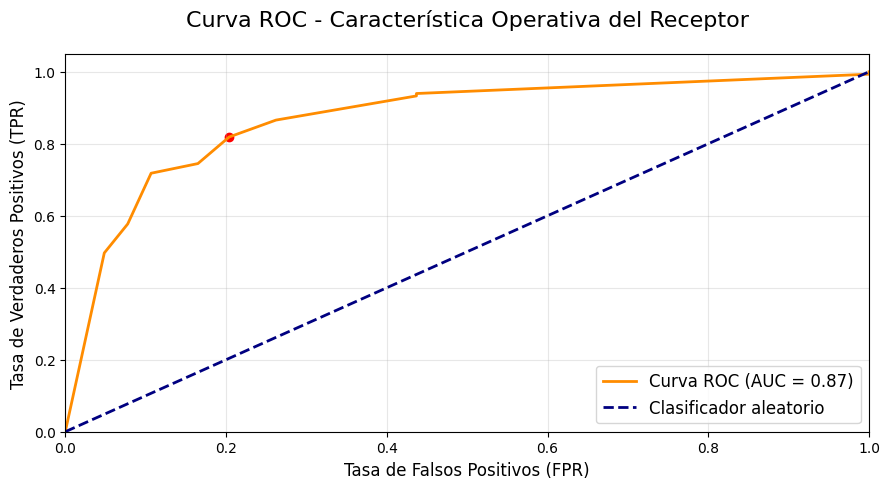


Área bajo la curva (AUC): 0.8700
Umbral óptimo: 0.7059


In [18]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from sklearn.metrics import roc_curve, auc


## 1. Obtener las probabilidades predichas y etiquetas reales
# Asumiendo que 'prediccionesPrueba' es tu DataFrame con las predicciones
predicciones = prediccionesPrueba.select(
    col("probability").alias("prob"),
    col("label").alias("label")
).toPandas()

# Extraer la probabilidad de la clase positiva (asumiendo problema binario)
predicciones['score'] = predicciones['prob'].apply(lambda x: x[1].item())  # Para modelos binarios

## 2. Calcular métricas ROC
fpr, tpr, thresholds = roc_curve(predicciones['label'], predicciones['score'])
roc_auc = auc(fpr, tpr)

## 3. Crear la gráfica ROC
plt.figure(figsize=(9, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Clasificador aleatorio')

## 4. Personalizar la gráfica
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.title('Curva ROC - Característica Operativa del Receptor', fontsize=16, pad=20)
plt.legend(loc="lower right", fontsize=12)

# Añadir cuadrícula para mejor lectura
plt.grid(True, alpha=0.3)

# Resaltar el punto óptimo (punto más cercano a la esquina superior izquierda)
distances = (fpr**2 + (1-tpr)**2)
optimal_idx = np.argmin(distances)
optimal_threshold = thresholds[optimal_idx]
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red',
            label=f'Punto óptimo (umbral={optimal_threshold:.2f})')

plt.tight_layout()
plt.show()

## 5. Métricas adicionales (opcional)
print(f"\nÁrea bajo la curva (AUC): {roc_auc:.4f}")
print(f"Umbral óptimo: {optimal_threshold:.4f}")

###Análisis de la curva ROC-AUC:
Enesta gáfica la curva naranja se eleva rápidamente y se mantiene cerca del extremo superior izquierdo, lo cual es una señal clara de un buen modelo. Entre más cerca esté esta curva del vértice (0,1), mejor será el rendimiento.

Por otro lado, el umbral de decisión óptimo indica el punto donde el modelo logra el mejor equilibrio entre sensibilidad y especificidad. Un umbral de 0.7059 sugiere que el modelo predice como “positivo” solo cuando la probabilidad supera este valor, lo que puede ayudar a reducir falsos positivos sin sacrificar en exceso la sensibilidad.

Por último, Un valor de AUC de 0.87 indica que el modelo tiene una excelente capacidad de discriminación entre clases (enfermo vs sano). En términos simples, el modelo tiene un 87% de probabilidad de clasificar correctamente un caso positivo como más probable que un caso negativo.



**12.- Terminar sesión SPARK**

```
spark.stop()
```

In [16]:
#Terminar sesión spark
spark.stop()

## **12.- Conclusiones: redacte sus conclusiones por cada paso y conclusión final de Cierre**

- A pesar de los inconvenientes presentados por problemas de eléctricidad, la flexibilidad y el tiempo extendido permitieron la culminación satisfactoria de este taller, y alcanzar los objetivos propuestos.

- La ausencia de valores nulos en el conjunto de datos, confirmada en la fase de exploración, proporcionó una base de datos limpia y con una buena calidad para el modelado. Adicionalmente, el análisis del balanceo de las clases reveló una distribución moderadamente equilibrada entre los casos positivos y negativos de cardiopatía en los conjuntos de entrenamiento y prueba. Esta buena calidad y balance de los datos son factores fundamentales que contribuyen positivamente a la robustez y fiabilidad del modelo entrenado, evitando sesgos hacia la clase mayoritaria.

- El análisis exploratorio inicial de la correlación entre variables destacó la notable influencia de la frecuencia cardíaca máxima (MaxHR) y el valor del segmento ST (Oldpeak) en la presencia de cardiopatía (HeartDisease). Particularmente, se observó que una menor frecuencia cardíaca máxima está asociada a un mayor riesgo de la enfermedad. Es interesante notar también la fuerte correlación negativa entre la Edad (Age) y la frecuencia cardíaca máxima (MaxHR), lo que sugiere que la edad avanzada es un factor que limita la capacidad del corazón para alcanzar frecuencias máximas elevadas, y que esta limitación, a su vez, parece estar vinculada a un mayor riesgo de cardiopatía.

- La evaluación del modelo de clasificación mediante diversas métricas arrojó resultados satisfactorios. Un Accuracy del 81% indica que el modelo tiene una buena capacidad general de clasificación. Destaca especialmente su Sensitivity del 82%, lo que significa que es efectivo identificando a los pacientes que realmente padecen cardiopatía, una métrica crucial en un contexto médico donde minimizar los falsos negativos es prioritario. La Precision del 85% sugiere que el modelo es bastante fiable cuando predice la presencia de la enfermedad, generando pocos falsos positivos. Finalmente, el valor AUC de 0.87 refuerza una buena capacidad para discriminar entre individuos sanos y enfermos, posicionándolo como una herramienta potencialmente valiosa para la detección de cardiopatías.


**Conclusión Final:**

   -  En resumen, este taller demostró el proceso de evaluación de un modelo de clasificación en PySpark, desde la carga y preparación de datos de alta calidad (libres de nulos y moderadamente balanceados) hasta la interpretación de métricas clave de rendimiento como Accuracy, Sensitivity, Specificity, Precision y AUC.Adicionalmente, El modelo de Árbol de Decisiones entrenado mostró un buen rendimiento en la detección de cardiopatías. Los resultados obtenidos sugieren que este enfoque con MLlib de PySpark es escalable y efectivo para el análisis de grandes volúmenes de datos en problemas de clasificación médica.